# Introduction to Cirq

This notebook will teach you the basics of simulation of quantum circuits using Cirq. 

# Install Cirq

Install Cirq if you haven't.

In [1]:
!pip install --quiet cirq

     |████████████████████████████████| 328 kB 8.8 MB/s 
     |████████████████████████████████| 47 kB 4.9 MB/s 
     |████████████████████████████████| 409 kB 44.0 MB/s 
     |████████████████████████████████| 1.5 MB 29.9 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 1.3 MB 49.8 MB/s 
     |████████████████████████████████| 52 kB 1.7 MB/s 
     |████████████████████████████████| 220 kB 63.0 MB/s 
     |████████████████████████████████| 97 kB 6.9 MB/s 
     |████████████████████████████████| 49 kB 7.0 MB/s 
     |████████████████████████████████| 65 kB 4.2 MB/s 
     |████████████████████████████████| 10.1 MB 13.0 MB/s 
     |████████████████████████████████| 53 kB 2.7 MB/s 
     |████████████████████████████████| 28.5 MB 52 kB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 229 kB 51.4 MB/s 
     |████████████████████████████████| 15.7 MB 124 kB/s 
     |█████████████████████████

# Importing packages

In [2]:
import cirq # No need to explain why
from cirq.contrib.svg import SVGCircuit # Required to display some fancy circuits
import numpy as np # Required to play around with pi

# Creating circuits

How to create quantum circuits in Cirq

## Step 1: Initialize circuit

Prepare the quantum circuit. This requires two steps:
1. Initialize a quantum circuit
2. Initialize the required number of qubits

In [3]:
# Initialize circuit 
circuit = cirq.Circuit()

In [4]:
# Initialize qubits
q0, q1 = cirq.LineQubit.range(2)

## Step 2: Apply gates

Now, we shall start applying the gates

In [5]:
# Prepare X gate on qubit 0
circuit.append(cirq.X(q0))

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


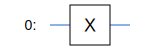

In [6]:
# Visualize the circuit
SVGCircuit(circuit)

In [7]:
# Hadamard gate
circuit.append(cirq.H(q0))

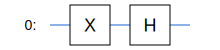

In [8]:
# Visualize the circuit
SVGCircuit(circuit)

In [9]:
# Rx gate
circuit.append(cirq.rx(np.pi/4)(q0))

# Ry gate
circuit.append(cirq.ry(np.pi/8)(q0))

# Rz gate
circuit.append(cirq.rz(np.pi/16)(q0))

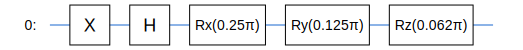

In [10]:
# Visualize the circuit
SVGCircuit(circuit)

In [11]:
# CNOT gate
circuit.append(cirq.CNOT(q0, q1))

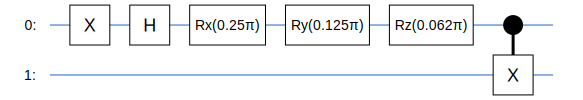

In [12]:
# Visualize the circuit
SVGCircuit(circuit)

## Step 3: Measure

In [13]:
# Meaure qubits 0,1
circuit.append(cirq.measure(q0, q1, key='0'))

# Circuit Simulation

Measurement result of qubits: Counter({0: 700, 3: 300})


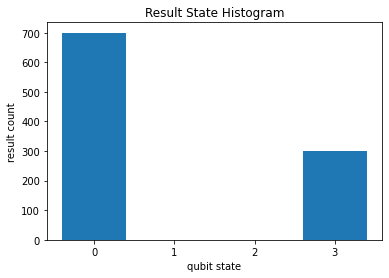

In [18]:
s=cirq.Simulator()
samples=s.run(circuit, repetitions=1000)

# Print Measurement results
print("Measurement result of qubits: {}".format(samples.histogram(key='0')))

# Plot the results
cirq.vis.plot_state_histogram(samples)

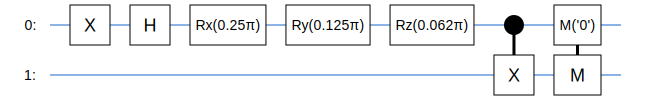

In [ ]:
# Visualize the circuit
SVGCircuit(circuit)

In [14]:
print(circuit)

0: ───X───H───Rx(0.25π)───Ry(0.125π)───Rz(0.062π)───@───M('0')───
                                                    │   │
1: ─────────────────────────────────────────────────X───M────────


# Reading the statevector

During simulations, Cirq allows one to take a sneak peak at the state.

In [ ]:
# Initialize circuit 
circuit = cirq.Circuit()

# Initialize qubits
q0, q1 = cirq.LineQubit.range(2)

# Prepare Hadamrad gate on qubit 0
circuit.append(cirq.H(q0))

# Prepare Hadamrad gate on qubit 1
circuit.append(cirq.H(q1))

# Extract the statevector
s=cirq.Simulator()
result=s.simulate(circuit)
statevector = result.final_state_vector
print(statevector)

[0.49999997+0.j 0.49999997+0.j 0.49999997+0.j 0.49999997+0.j]
